In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch
import torch.nn.functional as F
torch.cuda.set_device(1)
import models, train, utils
from importlib import reload
reload(models)
reload(train)
reload(utils)

<module 'utils' from '/home/cse/btech/cs1180416/col870-deep-learning/A2/utils.py'>

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
target_y = torch.load('data/pt-cache/target_pred.pt')
query_y = torch.load('data/pt-cache/query_pred_adv.pt')

In [4]:
target_X = torch.load('data/pt-cache/target_X_split.pt')
query_X = torch.load('data/pt-cache/query_X_split.pt')

In [5]:
train_X, test_X, train_y, test_y = train_test_split(
    target_X, target_y-1, test_size=10000, stratify=target_y)

In [6]:
lenet = models.LeNet()

In [7]:
train.train_net(lenet, train_X, train_y, lr=1e-3, batch_size=256, n_epochs=1, device=device)

[2.0773048400878906,
 2.0649609565734863,
 2.0657026767730713,
 2.056414842605591,
 2.0506973266601562,
 2.0407941341400146,
 2.0397160053253174,
 2.0130510330200195,
 2.001776933670044,
 1.9860036373138428,
 1.9712430238723755,
 1.936358094215393,
 1.9134836196899414,
 1.8642735481262207,
 1.8305495977401733,
 1.8107128143310547,
 1.7684133052825928,
 1.6780070066452026,
 1.6386739015579224,
 1.5692789554595947,
 1.529963493347168,
 1.438757061958313,
 1.3778631687164307,
 1.2492636442184448,
 1.1687662601470947,
 1.1072616577148438,
 0.9931065440177917,
 0.9269713163375854,
 0.7870469093322754,
 0.7688552141189575,
 0.6644601821899414,
 0.6461513042449951,
 0.5660824775695801,
 0.5790928602218628,
 0.4529286324977875,
 0.44952747225761414,
 0.404296875,
 0.3563387393951416,
 0.37072092294692993,
 0.2560497522354126,
 0.31353700160980225,
 0.28501570224761963,
 0.28653252124786377,
 0.3042677044868469,
 0.2523553669452667,
 0.20516154170036316,
 0.25235608220100403,
 0.286846935749053

In [8]:
test_pred = lenet.predict(test_X.to(device))
print(classification_report(test_y, test_pred.cpu()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1515
           1       1.00      1.00      1.00      1188
           2       1.00      1.00      1.00      1104
           3       1.00      1.00      1.00      1304
           4       1.00      1.00      1.00      1035
           5       1.00      1.00      1.00      1184
           6       1.00      1.00      1.00      1365
           7       1.00      1.00      1.00      1305

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [9]:
torch.save(lenet.state_dict(), 'data/pt-cache/lenet.pt')

In [10]:
train_X, test_X, train_y, test_y = train_test_split(
    query_X, (query_y == 0).float(), test_size=10000, stratify=query_y)

In [11]:
zero_c = models.ZeroClassifier()

In [ ]:
train.train_net(zero_c, train_X, train_y, lr=1e-3, batch_size=256, n_epochs=1, device=device)

In [ ]:
test_pred = zero_c.predict(test_X.to(device))
print(classification_report(test_y, test_pred.cpu()))

In [ ]:
torch.save(zero_c.state_dict(), 'data/pt-cache/zero_c.pt')

In [ ]:
dnet = models.DigitNet()
dnet.lenet.load_state_dict(torch.load('data/pt-cache/lenet.pt'))
dnet.zero_c.load_state_dict(torch.load('data/pt-cache/zero_c.pt'))
torch.save(dnet.state_dict(), 'data/pt-cache/dnet.pt')

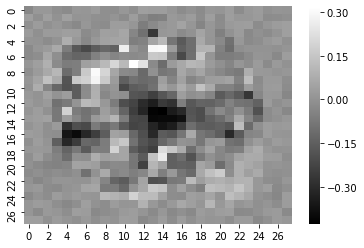

In [17]:
import seaborn as sns
sns.heatmap(zero_c.net.weight.view(28,28).detach().cpu(), cmap='gray')

In [18]:
zero_c.net.bias

Parameter containing:
tensor([-0.0242], device='cuda:1', requires_grad=True)